In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('\\Users\\piyus\\Downloads\\Company_Data (1).csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data1=data.copy()

In [5]:
data1['Status'] = data1['Sales'].apply(lambda Sales: 'Low' if Sales <= 7.5 else 'High')

In [6]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [7]:
data1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
Status          object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in data1.columns:
    print(i)
    if data1[i].dtypes == object:
        data1[i] = encoder.fit_transform(data1[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US
Status


In [9]:
data1.drop(['Sales'], axis=1, inplace=True)

In [10]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [11]:
x = data1.iloc[:, 0:10]
y = data1.iloc[:,10]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=59)

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=59)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=59)

In [14]:
pred=model.predict(x_test)

In [15]:
#Accuracy
np.mean(pred==y_test)

0.6666666666666666

[Text(193.15384615384616, 190.26, 'X[4] <= 131.5\nentropy = 0.999\nsamples = 280\nvalue = [136, 144]'),
 Text(103.01538461538462, 135.9, 'X[5] <= 0.5\nentropy = 0.982\nsamples = 216\nvalue = [125, 91]'),
 Text(51.50769230769231, 81.53999999999999, 'X[1] <= 98.5\nentropy = 0.845\nsamples = 55\nvalue = [15, 40]'),
 Text(25.753846153846155, 27.180000000000007, 'entropy = 0.624\nsamples = 45\nvalue = [7, 38]'),
 Text(77.26153846153846, 27.180000000000007, 'entropy = 0.722\nsamples = 10\nvalue = [8, 2]'),
 Text(154.52307692307693, 81.53999999999999, 'X[5] <= 1.5\nentropy = 0.901\nsamples = 161\nvalue = [110, 51]'),
 Text(128.76923076923077, 27.180000000000007, 'entropy = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(180.27692307692308, 27.180000000000007, 'entropy = 0.992\nsamples = 114\nvalue = [63, 51]'),
 Text(283.2923076923077, 135.9, 'X[2] <= 19.5\nentropy = 0.662\nsamples = 64\nvalue = [11, 53]'),
 Text(257.53846153846155, 81.53999999999999, 'X[0] <= 146.5\nentropy = 0.561\nsamples = 61

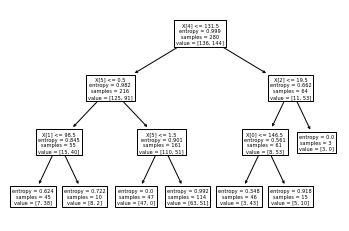

In [16]:
tree.plot_tree(model)

[Text(1073.076923076923, 990.9375, 'Price <= 131.5\nentropy = 0.999\nsamples = 280\nvalue = [136, 144]\nclass = High'),
 Text(572.3076923076923, 707.8125, 'ShelveLoc <= 0.5\nentropy = 0.982\nsamples = 216\nvalue = [125, 91]\nclass = Low'),
 Text(286.15384615384613, 424.6875, 'Income <= 98.5\nentropy = 0.845\nsamples = 55\nvalue = [15, 40]\nclass = High'),
 Text(143.07692307692307, 141.5625, 'entropy = 0.624\nsamples = 45\nvalue = [7, 38]\nclass = High'),
 Text(429.23076923076917, 141.5625, 'entropy = 0.722\nsamples = 10\nvalue = [8, 2]\nclass = Low'),
 Text(858.4615384615383, 424.6875, 'ShelveLoc <= 1.5\nentropy = 0.901\nsamples = 161\nvalue = [110, 51]\nclass = Low'),
 Text(715.3846153846154, 141.5625, 'entropy = 0.0\nsamples = 47\nvalue = [47, 0]\nclass = Low'),
 Text(1001.5384615384614, 141.5625, 'entropy = 0.992\nsamples = 114\nvalue = [63, 51]\nclass = Low'),
 Text(1573.8461538461538, 707.8125, 'Advertising <= 19.5\nentropy = 0.662\nsamples = 64\nvalue = [11, 53]\nclass = High'),


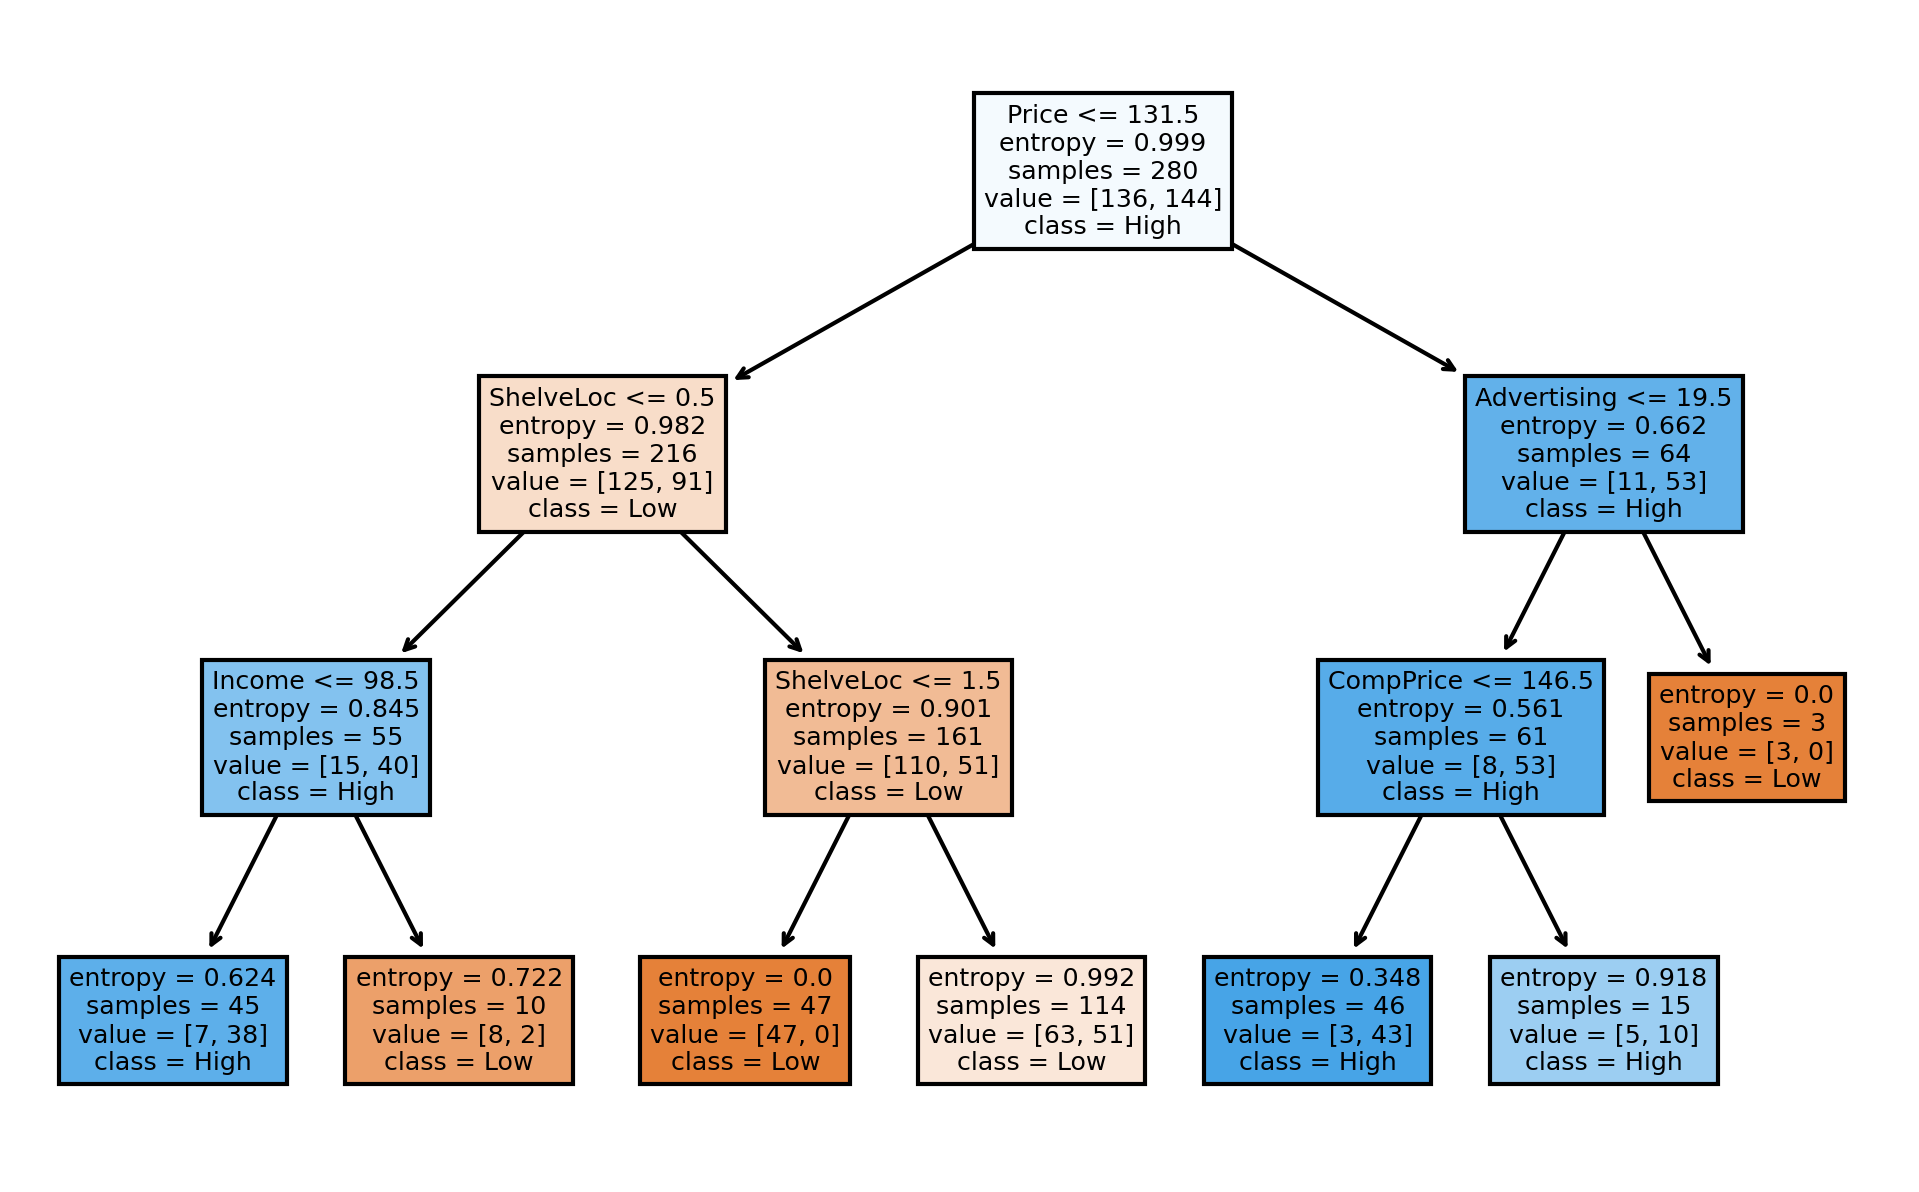

In [17]:
fn = data1.columns
cn = ['Low', 'High']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (8,5), dpi=300)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)